In [5]:
import os

# This code will list every file in your input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/avazu-ctr-prediction/sampleSubmission.gz
/kaggle/input/avazu-ctr-prediction/train.gz
/kaggle/input/avazu-ctr-prediction/test.gz


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The correct path with the correct .gz filename
file_path = '/kaggle/input/avazu-ctr-prediction/train.gz'

# Load a sample of the data. Pandas will handle the .gz file.
df = pd.read_csv(file_path, nrows=2000000, compression='gzip')

print("Sample dataset loaded successfully!")
print("Shape of the sample data:", df.shape)
display(df.head())

Sample dataset loaded successfully!
Shape of the sample data: (2000000, 24)


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [7]:
# Get a summary of data types and non-null values
print("--- Data Info ---")
df.info()

# Check for missing values in each column
print("\n--- Missing Values ---")
print(df.isnull().sum())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 366.2+ M

Click Distribution:
click
0    83.83955
1    16.16045
Name: proportion, dtype: float64



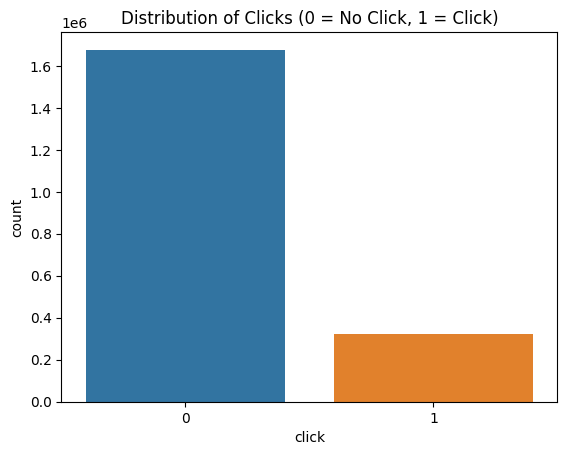

In [8]:
# Calculate the percentage of clicks vs. non-clicks
click_percentage = df['click'].value_counts(normalize=True) * 100
print(f"Click Distribution:\n{click_percentage}\n")

# Visualize the distribution
sns.countplot(x='click', data=df)
plt.title('Distribution of Clicks (0 = No Click, 1 = Click)')
plt.show()

In [9]:
# Calculate the number of unique values for a few key columns
print("--- Number of Unique Values in Key Columns ---")
print(f"Unique device_id: {df['device_id'].nunique()}")
print(f"Unique site_id: {df['site_id'].nunique()}")
print(f"Unique app_id: {df['app_id'].nunique()}")

--- Number of Unique Values in Key Columns ---
Unique device_id: 163262
Unique site_id: 2473
Unique app_id: 3108


In [10]:
# First, convert the 'hour' column to a proper datetime format
# The format '%y%m%d%H' matches the data (e.g., 14102100)
df['hour_datetime'] = pd.to_datetime(df['hour'], format='%y%m%d%H')

# Now, extract new features from the datetime column
df['day_of_week'] = df['hour_datetime'].dt.dayofweek
df['hour_of_day'] = df['hour_datetime'].dt.hour

# We can now drop the original 'hour' and the temporary datetime column
df = df.drop(columns=['hour', 'hour_datetime'])

# Display the first few rows to see our new features
print("--- DataFrame with New Time-Based Features ---")
display(df.head())

--- DataFrame with New Time-Based Features ---


,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,day_of_week,hour_of_day
0,1.000009e+18,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,-1,79,1,0
1,1.000017e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15704,320,50,1722,0,35,100084,79,1,0
2,1.000037e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15704,320,50,1722,0,35,100084,79,1,0
3,1.000064e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,100084,79,1,0
4,1.000068e+19,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,18993,320,50,2161,0,35,-1,157,1,0


In [11]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# --- 1. Prepare Data for Modeling ---

# Drop the identifier column 'id' as it's not a predictive feature
df = df.drop(columns=['id'])

# Define features (X) and target (y)
X = df.drop(columns=['click'])
y = df['click']

# Identify which columns are categorical for LightGBM
# This is more efficient than one-hot encoding for this model
categorical_features = [
    'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
    'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
    'device_type', 'device_conn_type', 'C1', 'C14', 'C15', 'C16', 'C17',
    'C18', 'C19', 'C20', 'C21', 'day_of_week', 'hour_of_day'
]

# Convert categorical feature columns to 'category' dtype for LightGBM
for col in categorical_features:
    X[col] = X[col].astype('category')

# Split data into training and testing sets
# We use stratify=y to ensure the click distribution is the same in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# --- 2. Build and Train the LightGBM Model ---

print("Training the LightGBM model...")
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train, y_train, categorical_feature=categorical_features)
print("Training complete.")


# --- 3. Make Predictions and Evaluate ---

# Predict the probabilities of a click (we need probabilities for LogLoss)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the LogLoss score
loss = log_loss(y_test, y_pred_proba)

print(f"\n--- Final Model Performance ---")
print(f"The LogLoss score on the test set is: {loss:.4f}")

Training the LightGBM model...
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 258567, number of negative: 1341433
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.122376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17433
[LightGBM] [Info] Number of data points in the train set: 1600000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161604 -> initscore=-1.646339
[LightGBM] [Info] Start training from score -1.646339
Training complete.

--- Final Model Performance ---
The LogLoss score on the test set is: 0.3752


In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# A global variable to hold the current ad sample
current_sample = None

# --- 1. Create the Interactive Widgets ---
style = {'description_width': 'initial'}
hour_slider = widgets.IntSlider(value=12, min=0, max=23, description='Hour of Day:', style=style)
day_dropdown = widgets.Dropdown(options=[('Monday', 0), ('Tuesday', 1), ('Wednesday', 2), ('Thursday', 3), ('Friday', 4), ('Saturday', 5), ('Sunday', 6)], description='Day of Week:', style=style)

# --- 2. Create Buttons and Output Area ---
new_sample_button = widgets.Button(description="Get New Random Ad", button_style='info')
predict_button = widgets.Button(description="Predict Click Probability", button_style='success')
output_area = widgets.Output()

# --- 3. Define the Functions ---
def get_new_sample(b):
    global current_sample
    with output_area:
        clear_output()
        current_sample = X_test.sample(1)
        hour_slider.value = current_sample['hour_of_day'].iloc[0]
        day_dropdown.value = current_sample['day_of_week'].iloc[0]
        
        print("--- New Ad Sample Loaded (Original Values) ---")
        display(current_sample[['device_type', 'banner_pos', 'app_category', 'hour_of_day', 'day_of_week']])

def predict_click_rate(b):
    global current_sample
    with output_area:
        if current_sample is None:
            print("Please get a new ad sample first.")
            return
            
        modified_sample = current_sample.copy()
        modified_sample['hour_of_day'] = hour_slider.value
        modified_sample['day_of_week'] = day_dropdown.value
        
        # --- FIX: Align categorical dtypes to match the training data ---
        for col in X_train.select_dtypes(include=['category']).columns:
            modified_sample[col] = modified_sample[col].astype(X_train[col].dtype)

        # Now the dtypes match, and prediction will work
        prediction_proba = model.predict_proba(modified_sample)[:, 1]
        
        print("\n--- Prediction Result ---")
        print(f"Predicted Click-Through Rate (CTR): {prediction_proba[0]:.2%}")

# --- 4. Link Functions to Buttons ---
new_sample_button.on_click(get_new_sample)
predict_button.on_click(predict_click_rate)

# --- 5. Display the UI ---
print("Click 'Get New Random Ad' to start.")
ui = widgets.VBox([
    widgets.HBox([hour_slider, day_dropdown]),
    widgets.HBox([new_sample_button, predict_button]),
    output_area
])

display(ui)

Click 'Get New Random Ad' to start.


In [14]:
import joblib
import json

# Save the trained LightGBM model
joblib.dump(model, 'ctr_lgbm_model.joblib')

# Save the list of feature columns
model_columns = list(X.columns)
with open('ctr_model_columns.json', 'w') as f:
    json.dump(model_columns, f)

print("Model and columns saved successfully.")

Model and columns saved successfully.
